<a href="https://colab.research.google.com/github/LenaVolzhina/playing-with-kaggle/blob/master/clouds/explore_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Prepare

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path_to_data = '/content/drive/My Drive/Colab Notebooks/kaggle clouds/data/'
!ls "{path_to_data}"

sample_submission.csv  test_images  train.csv  train_images


In [4]:
import pandas as pd

train_data = pd.read_csv(path_to_data + 'train.csv')
train_data['Image'] = train_data['Image_Label'].apply(lambda s: s.split('_')[0])
train_data['Label'] = train_data['Image_Label'].apply(lambda s: s.split('_')[1])

print(train_data.shape)
train_data.head()

(22184, 4)


Image_Label  ...   Label
0    0011165.jpg_Fish  ...    Fish
1  0011165.jpg_Flower  ...  Flower
2  0011165.jpg_Gravel  ...  Gravel
3   0011165.jpg_Sugar  ...   Sugar
4    002be4f.jpg_Fish  ...    Fish

[5 rows x 4 columns]

### Plot images

In [20]:
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline

In [8]:
labels = ['Fish', 'Flower', 'Gravel', 'Sugar']

def get_mask_from_rle(rle, h, w):
    mask = np.zeros(shape=h * w)
    splitted = list(map(int, rle.split()))
    for start, length in zip(splitted[::2], splitted[1::2]):
        start -= 1
        mask[start:start + length] = 1
    
    return mask.reshape((w, h)).T

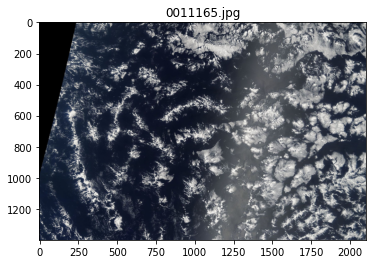

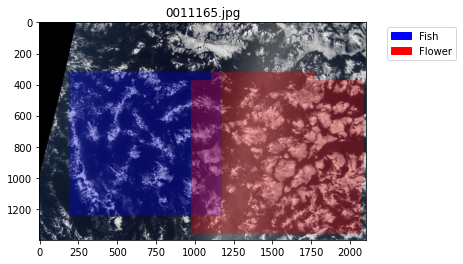

In [38]:
colors = {'Fish': 'blue', 'Flower': 'red', 'Gravel': 'yellow', 'Sugar': 'white'}
cmaps = {key: matplotlib.colors.ListedColormap(['black', val]) for key, val in colors.items()}   # convert to colormaps

def show_image(image, show_masks=True):
    img = mpimg.imread('{}train_images/{}'.format(path_to_data, image))
    h, w, _ = img.shape

    plt.figure()
    plt.imshow(img)
    plt.title(image)

    if show_masks:
        data = train_data[train_data.Image == image]
        used_labels = []
        for label in labels:
            # plt.figure()
            rle = data[data.Label == label]['EncodedPixels'].values[0]
            if isinstance(rle, str):
                used_labels.append(label)
                mask = get_mask_from_rle(rle, h, w)
                mask[mask == 0] = np.nan
                plt.imshow(
                    mask, alpha=0.3, cmap=cmaps[label], label=label, vmin=0, vmax=1
                )
                
        # legend etc
        patches = [matplotlib.patches.Patch(color=colors[label], label=label) for label in used_labels]
        plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2)
    
show_image('0011165.jpg', False)
show_image('0011165.jpg', True)

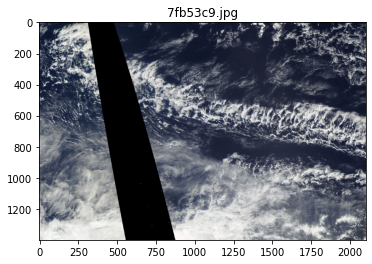

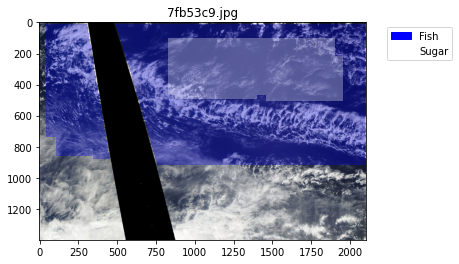

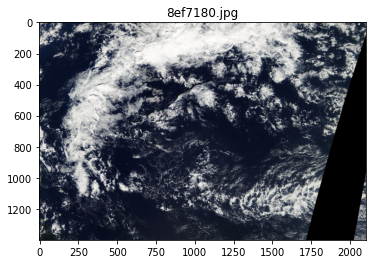

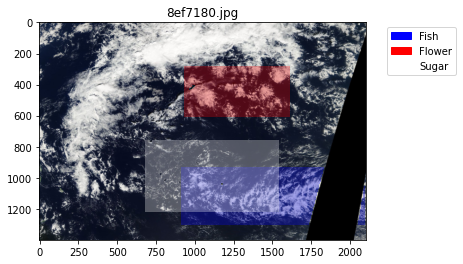

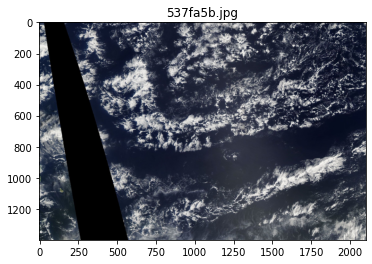

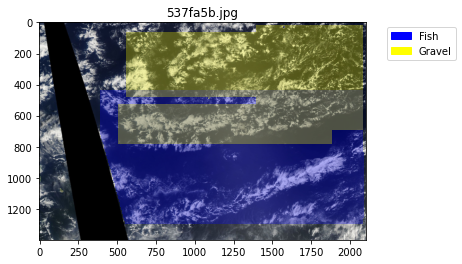

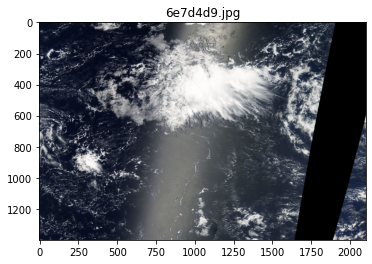

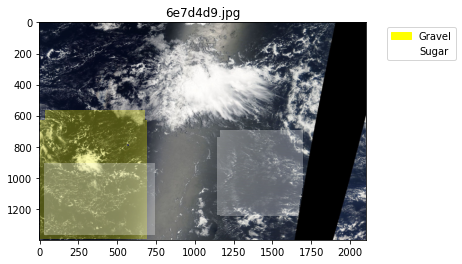

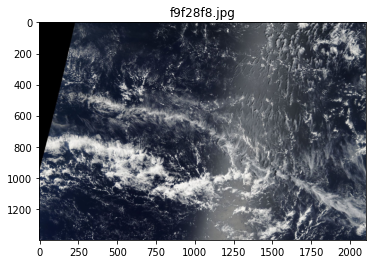

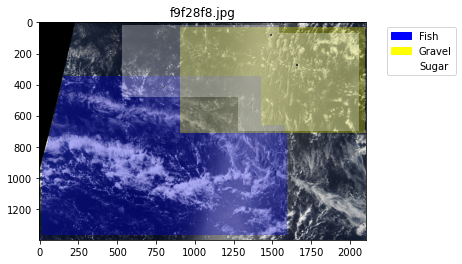

In [39]:
for img in list(set(train_data.Image))[:5]:
    show_image(img, False)
    show_image(img, True)

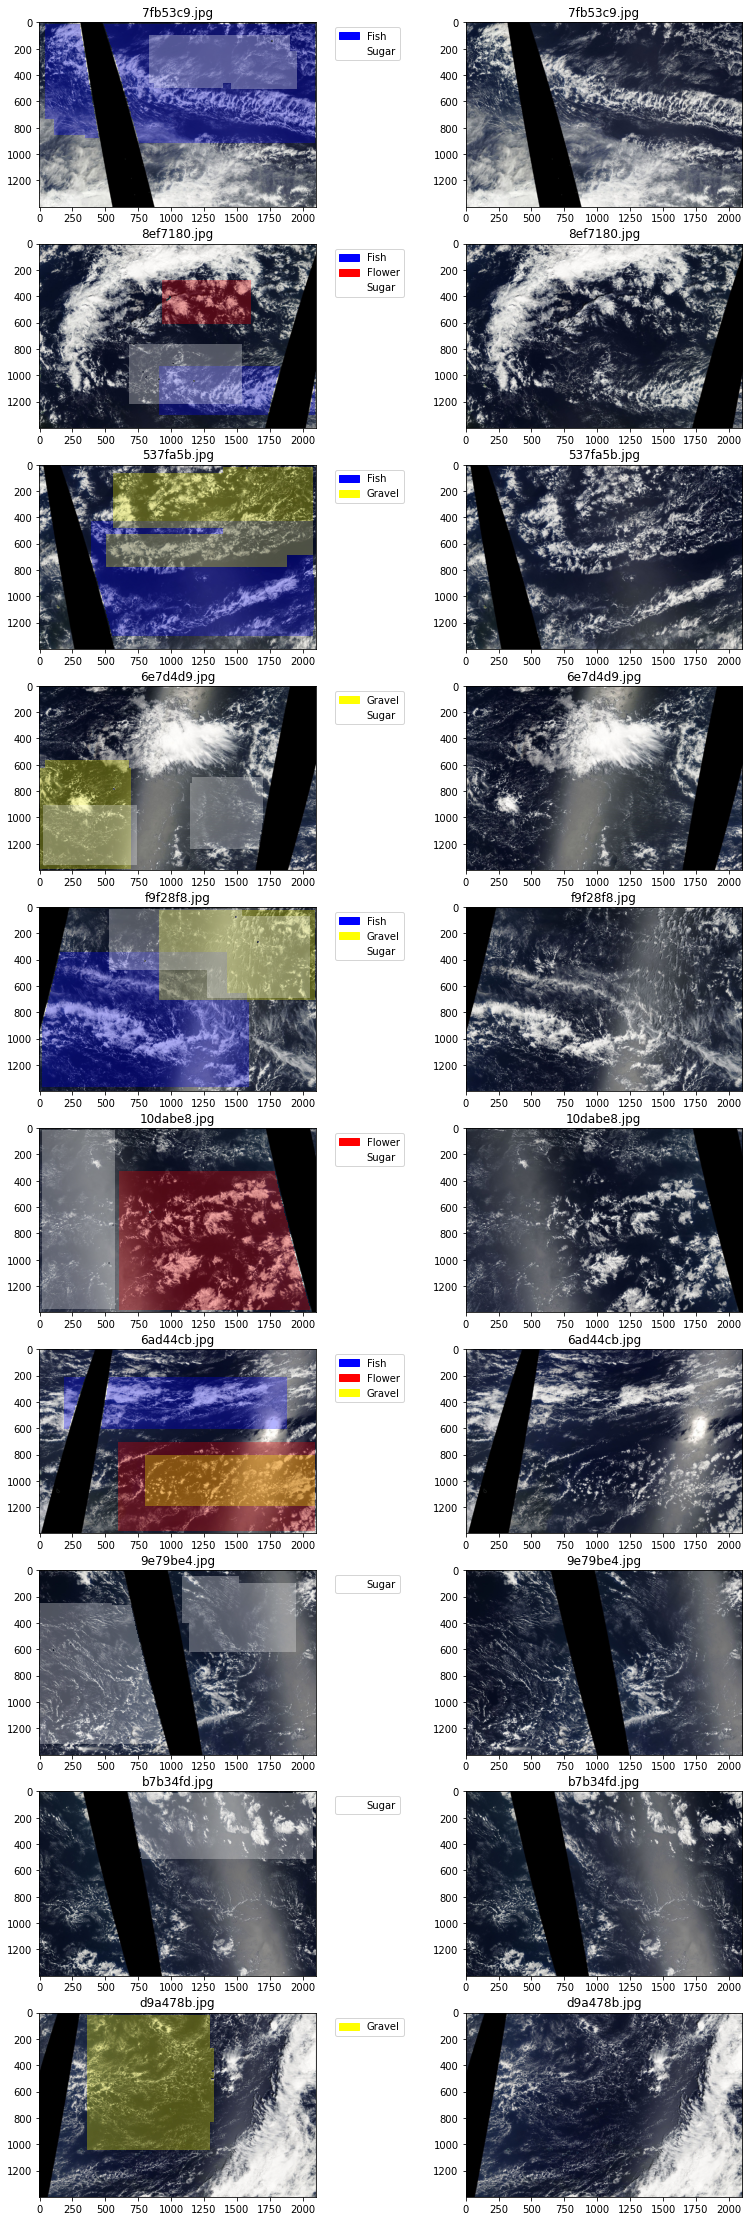

In [44]:
def show_image(image, ax, show_masks=True):
    img = mpimg.imread('{}train_images/{}'.format(path_to_data, image))
    h, w, _ = img.shape

    # plt.figure()
    ax.imshow(img)
    ax.set_title(image)

    if show_masks:
        data = train_data[train_data.Image == image]
        used_labels = []
        for label in labels:
            # plt.figure()
            rle = data[data.Label == label]['EncodedPixels'].values[0]
            if isinstance(rle, str):
                used_labels.append(label)
                mask = get_mask_from_rle(rle, h, w)
                mask[mask == 0] = np.nan
                ax.imshow(
                    mask, alpha=0.3, cmap=cmaps[label], label=label, vmin=0, vmax=1
                )
                
        # legend etc
        patches = [matplotlib.patches.Patch(color=colors[label], label=label) for label in used_labels]
        ax.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2)

nimg = 10
_, axes = plt.subplots(nrows=nimg, ncols=2, figsize=(2 * 7, nimg * 4))
for img, (ax1, ax2) in zip(list(set(train_data.Image)), axes):
    show_image(img, ax1, True)
    show_image(img, ax2, False)